### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [48]:
%pip install bs4
%pip install nbformat

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install yfinance

  Using cached yfinance-0.2.43-py2.py3-none-any.whl.metadata (11 kB)
  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached numpy-2.1.0-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached lxml-5.3.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.8 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached frozendict-2.4.4-py312-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached yfinance-0.2.43-py2.py3-none-any.whl (84 kB)
Using cached frozendict-2.4.4-py312-none-any.whl (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached lxml-5.3.0-cp312-cp312-macosx_10_9_universal2.whl (8.2 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using 

In [2]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [19]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 1.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'TSLA'

# Get the data for Tesla
tesla_data = yf.download(ticker_symbol, start="2020-01-01", end="2023-01-01")

# Display the first few rows of the data
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [3]:
%pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [35]:
# Define the URL
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a request to fetch the page content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Page successfully retrieved")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Page successfully retrieved


In [36]:
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table that contains the Tesla revenue data
table = soup.find('table')

In [38]:
# Extract table headers
headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

print("Headers:", headers)

# Extract table rows
rows = []
for tr in table.find_all('tr'):
    cells = []
    for td in tr.find_all('td'):
        cells.append(td.text.strip())
    if cells:  # Avoid adding empty rows
        rows.append(cells)

# Print the first few rows to inspect
print("First row:", rows[0])
print("Number of headers:", len(headers))
print("Number of columns in first row:", len(rows[0]))

Headers: ['Tesla Annual Revenue(Millions of US $)']
First row: ['2021', '$53,823']
Number of headers: 1
Number of columns in first row: 2


In [40]:
# Example of scraping headers from a table
headers = [header.text for header in table.find_all('th')]
# Check if the number of columns matches
if len(headers) == len(rows[0]):
    # Create the DataFrame
    revenue_data_tesla = pd.DataFrame(rows, columns=headers)
else:
    # If there's a mismatch, handle it (e.g., by adding a placeholder header)
    if len(rows[0]) > len(headers):
        headers.append('Extra Column')
    revenue_data_tesla = pd.DataFrame(rows, columns=headers)

# Display the DataFrame
revenue_data_tesla.head()

,Tesla Annual Revenue(Millions of US $),Extra Column
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [6]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'GME'

# Get the data for Tesla
gamestop_data = yf.download(ticker_symbol, start="2020-01-01", end="2023-01-01")

# Display the first few rows of the data
gamestop_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1.5350,1.6175,1.5175,1.5775,1.5775,17814400
2020-01-03,1.5525,1.5625,1.4600,1.4700,1.4700,14175600
2020-01-06,1.4500,1.4775,1.4000,1.4625,1.4625,13579200
2020-01-07,1.4425,1.4575,1.3600,1.3800,1.3800,20912000
2020-01-08,1.3725,1.4625,1.3525,1.4300,1.4300,22517600


### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [9]:
import requests

# Define the URL for the GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Make a GET request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

In [101]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Tesla revenue data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a request to fetch the page content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Page successfully retrieved")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table that contains the Tesla revenue data
tesla_revenue_table = soup.find('table')

Page successfully retrieved


In [60]:
# Create an empty DataFrame to store the revenue data
columns = ["Date", "Revenue"]
tesla_revenue_data = pd.DataFrame(columns=columns)

# Loop through the table rows and extract the data
for row in tesla_revenue_table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    
    # Append the data to the DataFrame
    tesla_revenue_data = pd.concat([tesla_revenue_data, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Display the extracted revenue data
tesla_revenue_data.head()

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [97]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=0.3)
    
    stock_data_specific = stock_data[stock_data.index <= '2021-06-14']  # Data up to June 2021
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']  # Revenue data also up to June 2021
    
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=0.3)
    
    # Filter data up to specified dates
    stock_data_specific = stock_data[stock_data.index <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    
    # Add stock price trace
    fig.add_trace(go.Scatter(x=stock_data_specific.index, 
                             y=stock_data_specific['Close'], 
                             name="Share Price"), 
                  row=1, col=1)
    
    # Add revenue trace
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], 
                             y=revenue_data_specific['Revenue'], 
                             name="Revenue"), 
                  row=2, col=1)
    
    # Update axis labels
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Update layout and show the figure
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

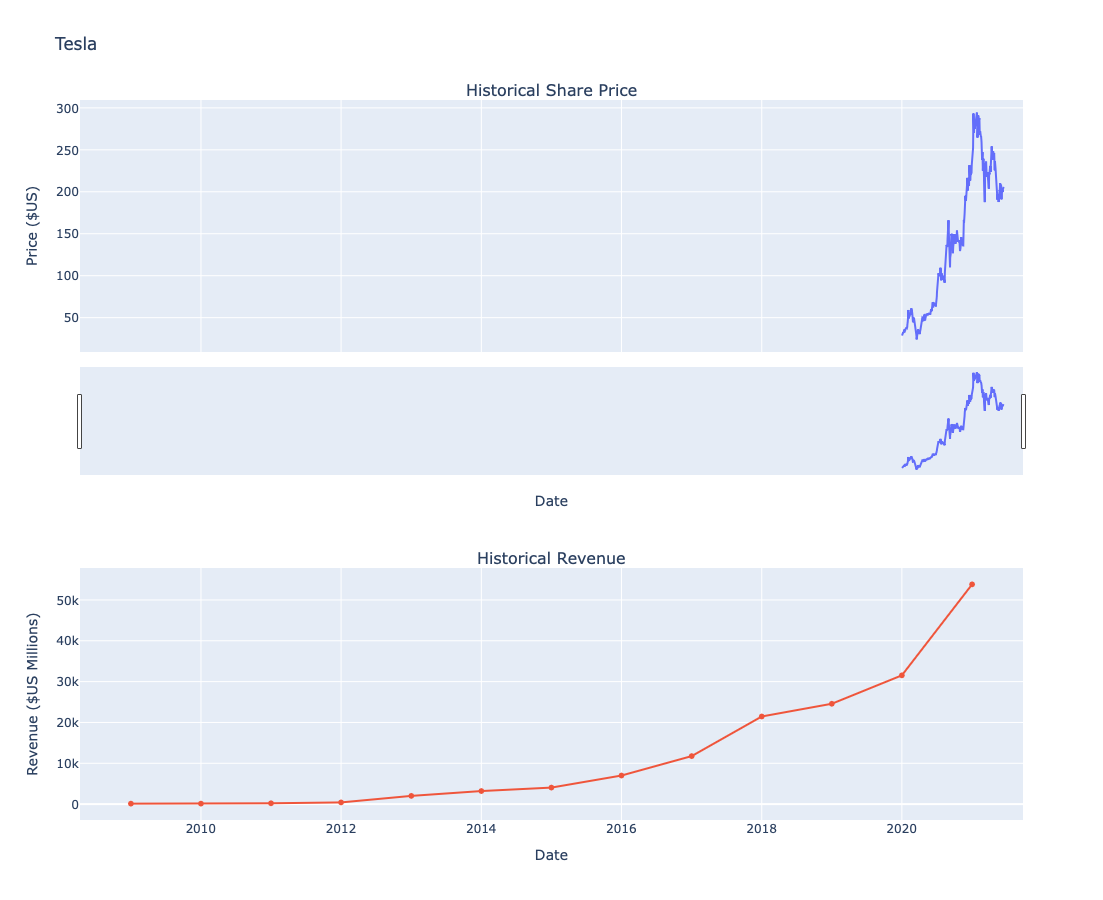

In [98]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

In [105]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 1. Get GameStop Stock Data
gme_data = yf.download('GME', start="2020-01-01", end="2021-06-14")

# 2. Scrape GameStop Revenue Data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')

# Extract table data into a DataFrame
rows = []
for tr in table.find_all('tr')[1:]:  # Skip the header row
    cells = tr.find_all('td')
    if len(cells) == 2:  # Ensure there are two columns: Date and Revenue
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        rows.append([date, revenue])

gme_revenue = pd.DataFrame(rows, columns=['Date', 'Revenue'])
# Display
print(gme_revenue.head())


[*********************100%***********************]  1 of 1 completed


   Date Revenue
0  2020  $6,466
1  2019  $8,285
2  2018  $8,547
3  2017  $7,965
4  2016  $9,364


In [106]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=0.3)
    
    stock_data_specific = stock_data[stock_data.index <= '2021-06-14']  # Data up to June 2021
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']  # Revenue data also up to June 2021
    
    fig.add_trace(go.Scatter(x=stock_data_specific.index, 
                             y=stock_data_specific['Close'], 
                             name="Share Price"), 
                  row=1, col=1)
    
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], 
                             y=revenue_data_specific['Revenue'], 
                             name="Revenue"), 
                  row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

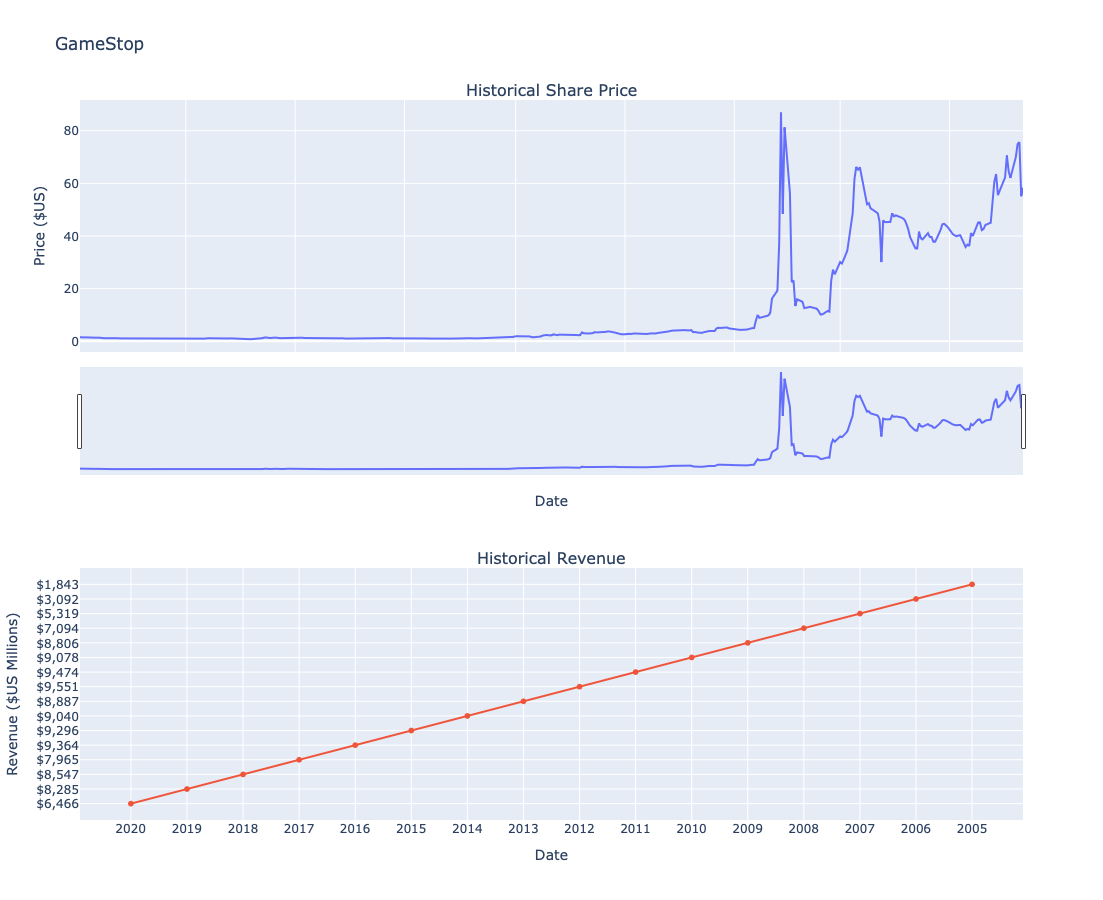

In [107]:
make_graph(gme_data, gme_revenue, 'GameStop')